In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import pandas

In [6]:
# notebook specific
%matplotlib inline

In [7]:
df = pandas.read_csv('/Users/andreas/single_cell_dataset.tsv', sep='\t')
df.head()

,sample,alignments_duplicate,alignments_filtered,alignments_mapped,alignments_mate_reverse,alignments_mate_unmapped,alignments_paired,alignments_proper_pair,alignments_qc_fail,alignments_read1,...,reads_mapped_unique,reads_missing,reads_multimapping,reads_total,reads_unmapped,input,lane,matched,percent_matched,unmatched
0,human-Plate7-A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,551986,NaN,0,0.000000,551986
1,human-Plate7-A10,5.0,33.0,33.0,16.0,9.0,42.0,0.0,0.0,21.0,...,33.0,0.0,0.0,42.0,9.0,659943,NaN,21,0.003182,659922
2,human-Plate7-A11,43.0,156.0,156.0,88.0,32.0,188.0,118.0,0.0,94.0,...,156.0,0.0,0.0,188.0,32.0,399100,NaN,94,0.023553,399006
3,human-Plate7-A12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2167137,NaN,0,0.000000,2167137
4,human-Plate7-A2,35.0,363.0,363.0,206.0,43.0,406.0,316.0,0.0,203.0,...,363.0,0.0,0.0,406.0,43.0,1360799,NaN,203,0.014918,1360596


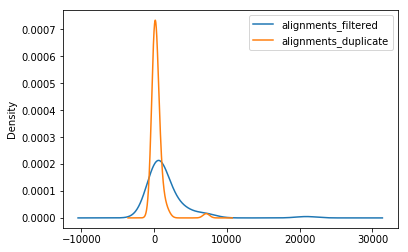

In [8]:
df[['alignments_filtered', 'alignments_duplicate']].plot.kde()


(array([44.,  6.,  2.,  3.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.00000e+00, 2.09180e+03, 4.18260e+03, 6.27340e+03, 8.36420e+03,
        1.04550e+04, 1.25458e+04, 1.46366e+04, 1.67274e+04, 1.88182e+04,
        2.09090e+04]),
 <a list of 10 Patch objects>)

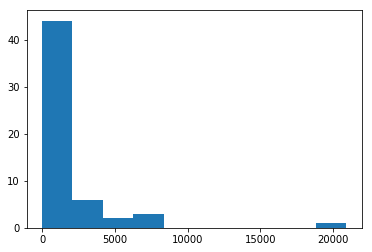

In [9]:
# matplotlib is not aware of pandas, so you need to give it the data in a clean way
plt.hist(df.alignments_filtered.dropna())

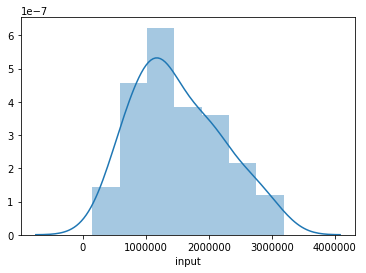

In [10]:
seaborn.distplot(df['input'])

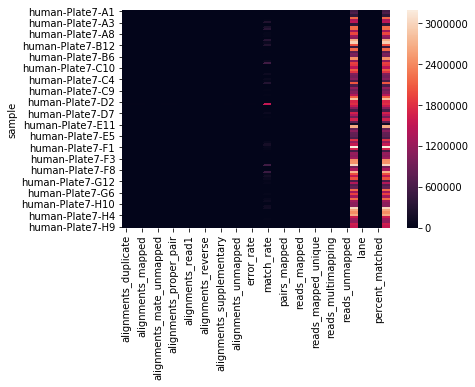

In [11]:
clean_df = df.set_index('sample').fillna(0)
seaborn.heatmap(clean_df)

In [12]:
# Step 1: add a column with cell rows (A-H)
# Step 2: add a column with cell columns (1-12)
# Step 3: pivot
display(df['sample'].head())
# split name such as human-Plate7-A1 into three columns with human, Plate7 and A1 as values
split_labels = df['sample'].str.split('-', expand=True)
display(split_labels.head())
# take the plate cell position as label
labels = split_labels[2]
display(labels.head())
# extract the row, which is the first character
row_labels = labels.str[0]
# extract the column, which is the remaining characters. Convert to int, to make sure columns are 
# sorted as expected.
col_labels = labels.str[1:].astype(int)
# build a new dataframe (pandas concat is an alternative)
new_df = pandas.DataFrame({'row_labels': row_labels, 'col_labels': col_labels, 'input': df['input']})
new_df.head()

0     human-Plate7-A1
1    human-Plate7-A10
2    human-Plate7-A11
3    human-Plate7-A12
4     human-Plate7-A2
Name: sample, dtype: object

,0,1,2
0,human,Plate7,A1
1,human,Plate7,A10
2,human,Plate7,A11
3,human,Plate7,A12
4,human,Plate7,A2


0     A1
1    A10
2    A11
3    A12
4     A2
Name: 2, dtype: object

,col_labels,input,row_labels
0,1,551986,A
1,10,659943,A
2,11,399100,A
3,12,2167137,A
4,2,1360799,A


col_labels,1,2,3,4,5,6,7,8,9,10,11,12
row_labels,,,,,,,,,,,,
A,551986,1360799,1490827,395423,2204117,2198977,1282005,1963368,1269605,659943,399100,2167137
B,1103274,472772,2171394,741149,989576,937891,2444957,1146341,1913734,2664639,2950440,2015119
C,1846664,1045565,940198,1084341,601227,2060697,625961,1164076,934033,1477896,2077763,1810561
D,1066288,1710692,1804956,1563885,1074502,612821,1666626,1388890,943695,1422229,2099721,2818001
E,1659942,823964,1112745,825594,793716,639239,1799785,1188017,1563773,783797,149472,2657800
F,3192273,1111499,1262054,2439997,2471473,3015245,947066,1351614,2718766,1670113,566127,1189233
G,2021799,1397402,710167,831037,2187050,1290881,1913686,1300009,2183374,1549278,2028842,631055
H,1249587,2608104,2440452,2657822,1615205,1301494,1174470,1629874,1548465,1122555,1099682,3008596


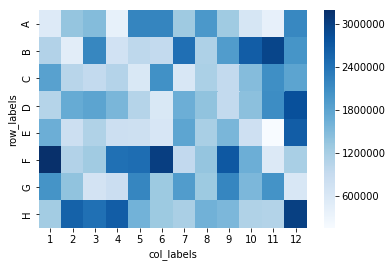

In [13]:
p_df = new_df.pivot(index='row_labels', columns='col_labels', values='input')
display(p_df)
seaborn.heatmap(p_df, cmap='Blues')